In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = None

In [116]:
#Combine all the data I have so far in a dataframe - currently at 2800/5400ish

complete_data = pd.read_pickle('set1.pickle')
for i in range(1,31):
    try:
        data_set = 'set' + str(i)
        data_to_add = pd.read_pickle(data_set+'.pickle')
        complete_data = complete_data.append(data_to_add)
    except:
        continue

In [56]:

#Generally looks okay - one thing I need to make sure of is that the unique street is not the same as the count. 
#These should be unique since I'm considering them my primary keys


In [117]:
#Need to strip lot_size columns so I can make it numeric 
test_data = complete_data.copy()
test_data
# test_data['lot_size'] = test_data['lot_size'].str.strip('Sq. Ft. Acres')
# test_data['lot_size'] = test_data['lot_size'].str.replace(',', '')
# test_data['lot_size'] = pd.to_numeric(test_data['lot_size'], errors = 'coerce')
# test_data['lot_size'] = test_data['lot_size'].str.replace('NaN', '0')
# test_data['lot_size'] = test_data['lot_size'].str.replace('-', '0')
# test_data.info()
# test_data['lot_size'] = np.where((test_data['lot_size'] < 5), test_data['lot_size']*45830, df['lot_size'])
# test_data.loc[test_data['lot_size'] < 5] = test_data['lot_size']*45860

# test_data.drop(['fireplace', 'view', 'transit_score', 'bike_score'], axis = 1, inplace = True)
# test_data['lot_size'] = test_data['lot_size'].apply(lambda x: test_data['lot_size'][x:x+1]*45860 if x < 5 else test_data['lot_size'][x:x+1])

street      city state zipcode sold_price beds baths  \
0              2820 SW Fern St  Portland    OR   97201    1050000    5     4   
1   111 SW Harrison St Unit 8C  Portland    OR   97201     220000    1     1   
2   111 SW Harrison St Unit 7G  Portland    OR   97201     214900    1     1   
3            2809 SW Water Ave  Portland    OR   97201     299500    2     1   
4   255 SW Harrison St Unit 5C  Portland    OR   97201     201000    1     1   
..                         ...       ...   ...     ...        ...  ...   ...   
69           9635 SE Knight St  Portland    OR   97266     297000    2     1   
70            5030 SE 85th Ave  Portland    OR   97266     344754    1     1   
71          8923 SE Reedway St  Portland    OR   97266     526000    6   3.5   
72        7835 SE 92nd Ave #26  Portland    OR   97266     204218    —   2.5   
73           5109 SE 113th Ave  Portland    OR   97266     245000    2     1   

   sq_feet sale_price redfin_est price_sq_ft hoa_dues year_built  \
0     4353    1050000    1028001         241      NaN       1985   
1      600     220000     220237         367      361       1965   
2      600        NaN     210827         358      377       1965   
3     1926        NaN     295027         156      NaN       1896   
4      600        NaN     195760         335      512       1965   
..     ...        ...        ...         ...      ...        ...   
69     864     297000     334150         344      NaN       1910   
70     572        NaN       1Bed         NaN      NaN       1947   
71    2241     526000     534640         235      NaN       1910   
72    1160        NaN      —Beds         NaN      NaN       1979   
73     700     245000     277947         350      NaN       1947   

                           property_type                     community  \
0   Residential, Single Family Residence  Portland Heights, West Hills   
1               Residential, Condominium                 HARRISON EAST   
2               Residential, Condominium              South Auditorium   
3   Residential, Single Family Residence  Portland West, Raleigh Hills   
4               Residential, Condominium  Portland West, Raleigh Hills   
..                                   ...                           ...   
69  Residential, Single Family Residence                         LENTS   
70             Single Family Residential                           NaN   
71  Residential, Single Family Residence                         LENTS   
72                           Condo/Co-op                           NaN   
73  Residential, Single Family Residence           POWELLHURST-GILBERT   

         lot_size                   cooling fireplace view  \
0   3,920 Sq. Ft.                 Heat Pump       yes  yes   
1             NaN  Central Air Conditioning       yes  yes   
2               —                 Heat Pump       yes  yes   
3   2,613 Sq. Ft.                        no       yes  yes   
4               —  Central Air Conditioning       yes  yes   
..            ...                       ...       ...  ...   
69  3,920 Sq. Ft.                        no       yes  yes   
70  5,000 Sq. Ft.                        no       yes  yes   
71  6,969 Sq. Ft.                      None       yes  yes   
72            NaN                        no       yes  yes   
73  6,969 Sq. Ft.                 Heat Pump       yes  yes   

                view_type site_views favorites_redfin favorites_MLS  \
0   Seasonal, Trees/Woods         93               59           110   
1             Territorial         88               61            23   
2                    City        109               28           103   
3          City, Mountain         69              275           314   
4                    City         18               40            70   
..                    ...        ...              ...           ...   
69                    NaN          5              124           137   
70                    NaN          0        

In [118]:
def create_features(test_data):
    # Quadrant to indicate neighborhood
    test_data['quadrant'] = test_data['street'].str.split(expand = True)[1]
    
    #Convert acres to sq feet
    test_data['lot_size'] = test_data['lot_size'].str.strip('Sq. Ft. Acres')
    test_data['lot_size'] = test_data['lot_size'].str.replace(',', '')
    test_data['lot_size'] = pd.to_numeric(test_data['lot_size'], errors = 'coerce')
    test_data['lot_size'] = np.where((test_data['lot_size'] < 5), test_data['lot_size']*43560, test_data['lot_size'])
    return test_data
test_data = create_features(test_data)


In [119]:
#Change datatypes for each column, include error handling
def update_dtypes(test_data):
    numeric_columns = ['sold_price', 'beds', 'baths', 'sq_feet', 
                       'sale_price', 'redfin_est', 'price_sq_ft', 'hoa_dues', 
                       'year_built', 'lot_size', 'site_views', 'favorites_redfin', 
                       'favorites_MLS', 'listed_price', 'price_change', 'walk_score'] 
    test_data[numeric_columns] = test_data[numeric_columns].apply(pd.to_numeric, errors = 'coerce')
    datetime_columns = ['delist_date', 'price_change_date', 'listed_date']
    test_data[datetime_columns] = test_data[datetime_columns].apply(pd.to_datetime, infer_datetime_format= True)
    return test_data
test_data = update_dtypes(test_data)


In [120]:
def drop_rows(test_data):
    #Scraped these columns incorrectly so I am dropping them for now
    test_data.drop(['fireplace', 'view', 'transit_score', 'bike_score', 'community', 'view_type', 'sale_price', 'redfin_est', 'favorites_MLS'], axis = 1, inplace = True)

    #Remove duplicates    
    test_data.drop_duplicates(inplace = True)

    #Remove any non-Portland
    test_data = test_data[test_data['city'] == 'Portland']

    #Drop duplicates of street
    test_data.drop_duplicates(subset = 'street', inplace = True)
    
    #Sold price and listed price - needed for feature calculation, so drop any without. 
    #These are from properties that opting to not disclose information. 
    test_data = test_data[test_data['sold_price'].notna()]
    
    #Listed price - also required for feature calculation, so drop any without
    test_data = test_data[test_data['listed_price'].notna()]
    
    # Don't include houses that were listed ages ago - always indicates missing info about most recent listing
    test_data = test_data[test_data['listed_date'] > pd.datetime(2019, 1, 1)]
    
    # Only include price_change if after listed_date
    conditions = [test_data['price_change_date'] == test_data['listed_date'], test_data['price_change_date'] > test_data['listed_date'], test_data['price_change_date'] < test_data['listed_date']]
    values = [test_data['price_change'], test_data['price_change'], 'NaN']
    test_data['price_change'] = np.select(conditions, values)
    test_data['price_change'] = test_data['price_change'].apply(pd.to_numeric, errors = 'coerce')
    test_data['price_change'] = test_data['price_change'].replace(0, np.nan)
    
    #Remove multi-family units and unusual property types and create dummy variable
    test_data = test_data[test_data['property_type'] != ('Multi-Family' or 'Multi-Family (2-4 Unit)')]
    test_data = test_data.groupby('property_type').filter(lambda x : len(x) > 4)
    
    #Remove weird quadrant values
    test_data = test_data.groupby('quadrant').filter(lambda x : len(x) > 4)
    
    #Next examine baths - rows with '-' indicate land instead of property, or homes without public info so drop these
    test_data = test_data[test_data['baths'].notna()]
    
    #Next examine square footage - what are the outliers? Drop NaN and ones that say sq_feet = 1
    #Change to int64
    test_data = test_data[test_data['sq_feet'].notna()]
    test_data = test_data[test_data['sq_feet'] > 10 ]
    
    test_data[['hoa_dues', 'lot_size', 'beds']] = test_data[['hoa_dues', 'lot_size', 'beds']].fillna(0)
    return test_data
test_data = drop_rows(test_data)
test_data

<ipython-input-120-c33fdad267ec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset = 'street', inplace = True)
<ipython-input-120-c33fdad267ec>:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test_data = test_data[test_data['listed_date'] > pd.datetime(2019, 1, 1)]


street      city state zipcode  sold_price  beds  \
0              2820 SW Fern St  Portland    OR   97201   1050000.0   5.0   
1   111 SW Harrison St Unit 8C  Portland    OR   97201    220000.0   1.0   
2   111 SW Harrison St Unit 7G  Portland    OR   97201    214900.0   1.0   
3            2809 SW Water Ave  Portland    OR   97201    299500.0   2.0   
4   255 SW Harrison St Unit 5C  Portland    OR   97201    201000.0   1.0   
..                         ...       ...   ...     ...         ...   ...   
63          11018 SE Malden St  Portland    OR   97266    630000.0   4.0   
64            8734 SE Knapp St  Portland    OR   97266    320000.0   3.0   
69           9635 SE Knight St  Portland    OR   97266    297000.0   2.0   
71          8923 SE Reedway St  Portland    OR   97266    526000.0   6.0   
73           5109 SE 113th Ave  Portland    OR   97266    245000.0   2.0   

    baths  sq_feet  price_sq_ft  hoa_dues  year_built  \
0     4.0   4353.0        241.0       0.0      1985.0   
1     1.0    600.0        367.0     361.0      1965.0   
2     1.0    600.0        358.0     377.0      1965.0   
3     1.0   1926.0        156.0       0.0      1896.0   
4     1.0    600.0        335.0     512.0      1965.0   
..    ...      ...          ...       ...         ...   
63    2.5   3041.0        207.0       0.0      1991.0   
64    2.0   1008.0        317.0       0.0      1979.0   
69    1.0    864.0        344.0       0.0      1910.0   
71    3.5   2241.0        235.0       0.0      1910.0   
73    1.0    700.0        350.0       0.0      1947.0   

                           property_type  lot_size                   cooling  \
0   Residential, Single Family Residence    3920.0                 Heat Pump   
1               Residential, Condominium       0.0  Central Air Conditioning   
2               Residential, Condominium       0.0                 Heat Pump   
3   Residential, Single Family Residence    2613.0                        no   
4               Residential, Condominium       0.0  Central Air Conditioning   
..                                   ...       ...                       ...   
63  Residential, Single Family Residence   10018.0  Central Air Conditioning   
64  Residential, Single Family Residence    6098.0                      None   
69  Residential, Single Family Residence    3920.0                        no   
71  Residential, Single Family Residence    6969.0                      None   
73  Residential, Single Family Residence    6969.0                 Heat Pump   

    site_views  favorites_redfin  listed_price listed_date  price_change  \
0         93.0              59.0     1075000.0  2021-03-08           NaN   
1         88.0              61.0      249000.0  2020-08-18      225000.0   
2        109.0              28.0      214900.0  2021-02-18           NaN   
3         69.0             275.0      375000.0  2020-10-09      299500.0   
4         18.0              40.0      209900.0  2020-10-06      198500.0   
..         ...               ...           ...         ...           ...   
63         3.0             108.0      599900.0  2021-01-13           NaN   
64         1.0             124.0      309900.0  2020-12-17      320000.0   
69         5.0             124.0      319900.0  2020-10-23      309900.0   
71         3.0              96.0      519000.0  2021-01-08           NaN   
73         2.0              72.0      270000.0  2020-12-29           NaN   

   price_change_date delist_date  walk_score quadrant  
0                NaT  2021-04-22          37       SW  
1         2021-03-11  2021-05-04          91       SW  
2                NaT  2021-04-30          91       SW  
3         2021-03-08  2021-04-30          85       SW  
4         2021-01-21  2021-04-27          93       SW  
..               ...         ...         ...      ...  
63               NaT  2021-02-18          13       SE  
64        2020-12-26  2021-02-18          60       SE  
69        2020-12-04  2021-02-08          66    

In [121]:
def get_pct_dif(test_data):#Create our feature
    test_data['pct_dif_listed'] = (test_data.sold_price - test_data.listed_price)/test_data.listed_price * 100
    test_data['pct_dif_price_change'] = ((test_data.sold_price-test_data.price_change)/test_data.price_change) * 100
    conditions = [test_data['pct_dif_price_change'].notna(), test_data['pct_dif_listed'].notna()]
    values = [test_data['pct_dif_price_change'], test_data['pct_dif_listed']]
    test_data['pct_dif'] = np.select(conditions, values)
    return test_data
test_data = get_pct_dif(test_data)
test_data

street      city state zipcode  sold_price  beds  \
0              2820 SW Fern St  Portland    OR   97201   1050000.0   5.0   
1   111 SW Harrison St Unit 8C  Portland    OR   97201    220000.0   1.0   
2   111 SW Harrison St Unit 7G  Portland    OR   97201    214900.0   1.0   
3            2809 SW Water Ave  Portland    OR   97201    299500.0   2.0   
4   255 SW Harrison St Unit 5C  Portland    OR   97201    201000.0   1.0   
..                         ...       ...   ...     ...         ...   ...   
63          11018 SE Malden St  Portland    OR   97266    630000.0   4.0   
64            8734 SE Knapp St  Portland    OR   97266    320000.0   3.0   
69           9635 SE Knight St  Portland    OR   97266    297000.0   2.0   
71          8923 SE Reedway St  Portland    OR   97266    526000.0   6.0   
73           5109 SE 113th Ave  Portland    OR   97266    245000.0   2.0   

    baths  sq_feet  price_sq_ft  hoa_dues  year_built  \
0     4.0   4353.0        241.0       0.0      1985.0   
1     1.0    600.0        367.0     361.0      1965.0   
2     1.0    600.0        358.0     377.0      1965.0   
3     1.0   1926.0        156.0       0.0      1896.0   
4     1.0    600.0        335.0     512.0      1965.0   
..    ...      ...          ...       ...         ...   
63    2.5   3041.0        207.0       0.0      1991.0   
64    2.0   1008.0        317.0       0.0      1979.0   
69    1.0    864.0        344.0       0.0      1910.0   
71    3.5   2241.0        235.0       0.0      1910.0   
73    1.0    700.0        350.0       0.0      1947.0   

                           property_type  lot_size                   cooling  \
0   Residential, Single Family Residence    3920.0                 Heat Pump   
1               Residential, Condominium       0.0  Central Air Conditioning   
2               Residential, Condominium       0.0                 Heat Pump   
3   Residential, Single Family Residence    2613.0                        no   
4               Residential, Condominium       0.0  Central Air Conditioning   
..                                   ...       ...                       ...   
63  Residential, Single Family Residence   10018.0  Central Air Conditioning   
64  Residential, Single Family Residence    6098.0                      None   
69  Residential, Single Family Residence    3920.0                        no   
71  Residential, Single Family Residence    6969.0                      None   
73  Residential, Single Family Residence    6969.0                 Heat Pump   

    site_views  favorites_redfin  listed_price listed_date  price_change  \
0         93.0              59.0     1075000.0  2021-03-08           NaN   
1         88.0              61.0      249000.0  2020-08-18      225000.0   
2        109.0              28.0      214900.0  2021-02-18           NaN   
3         69.0             275.0      375000.0  2020-10-09      299500.0   
4         18.0              40.0      209900.0  2020-10-06      198500.0   
..         ...               ...           ...         ...           ...   
63         3.0             108.0      599900.0  2021-01-13           NaN   
64         1.0             124.0      309900.0  2020-12-17      320000.0   
69         5.0             124.0      319900.0  2020-10-23      309900.0   
71         3.0              96.0      519000.0  2021-01-08           NaN   
73         2.0              72.0      270000.0  2020-12-29           NaN   

   price_change_date delist_date  walk_score quadrant  pct_dif_listed  \
0                NaT  2021-04-22          37       SW       -2.325581   
1         2021-03-11  2021-05-04          91       SW      -11.646586   
2                NaT  2021-04-30          91       SW        0.000000   
3         2021-03-08  2021-04-30          85       SW      -20.133333   
4         2021-01-21  2021-04-27          93       SW       -4.240114   
..               ...         ...         ...      ...             ...   
63               NaT  2021-02-18         

In [8]:
#Features to add - price change yes/no

#Cooling yes/no
#View? 

#Days on market


In [122]:
# test_data.sort_values('pct_dif', ascending = True).head(20)

# I examined the following three homes on redfin and there was clearly some irregularities so I dropped them from the analysis
test_data.drop(154, inplace = True)
test_data.drop([129, 114], inplace = True)
test_data.to_pickle('clean_redfin_data.pickle')

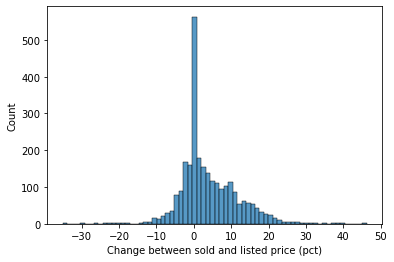

In [103]:
sns.histplot(test_data['pct_dif'])
test_data.to_pickle('clean_redfin_data.pickle')
plt.xlabel('Change between sold and listed price (pct)');
# test_data.describe()

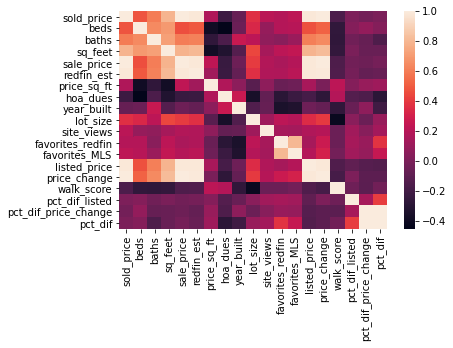

In [104]:
sns.heatmap(test_data.corr());

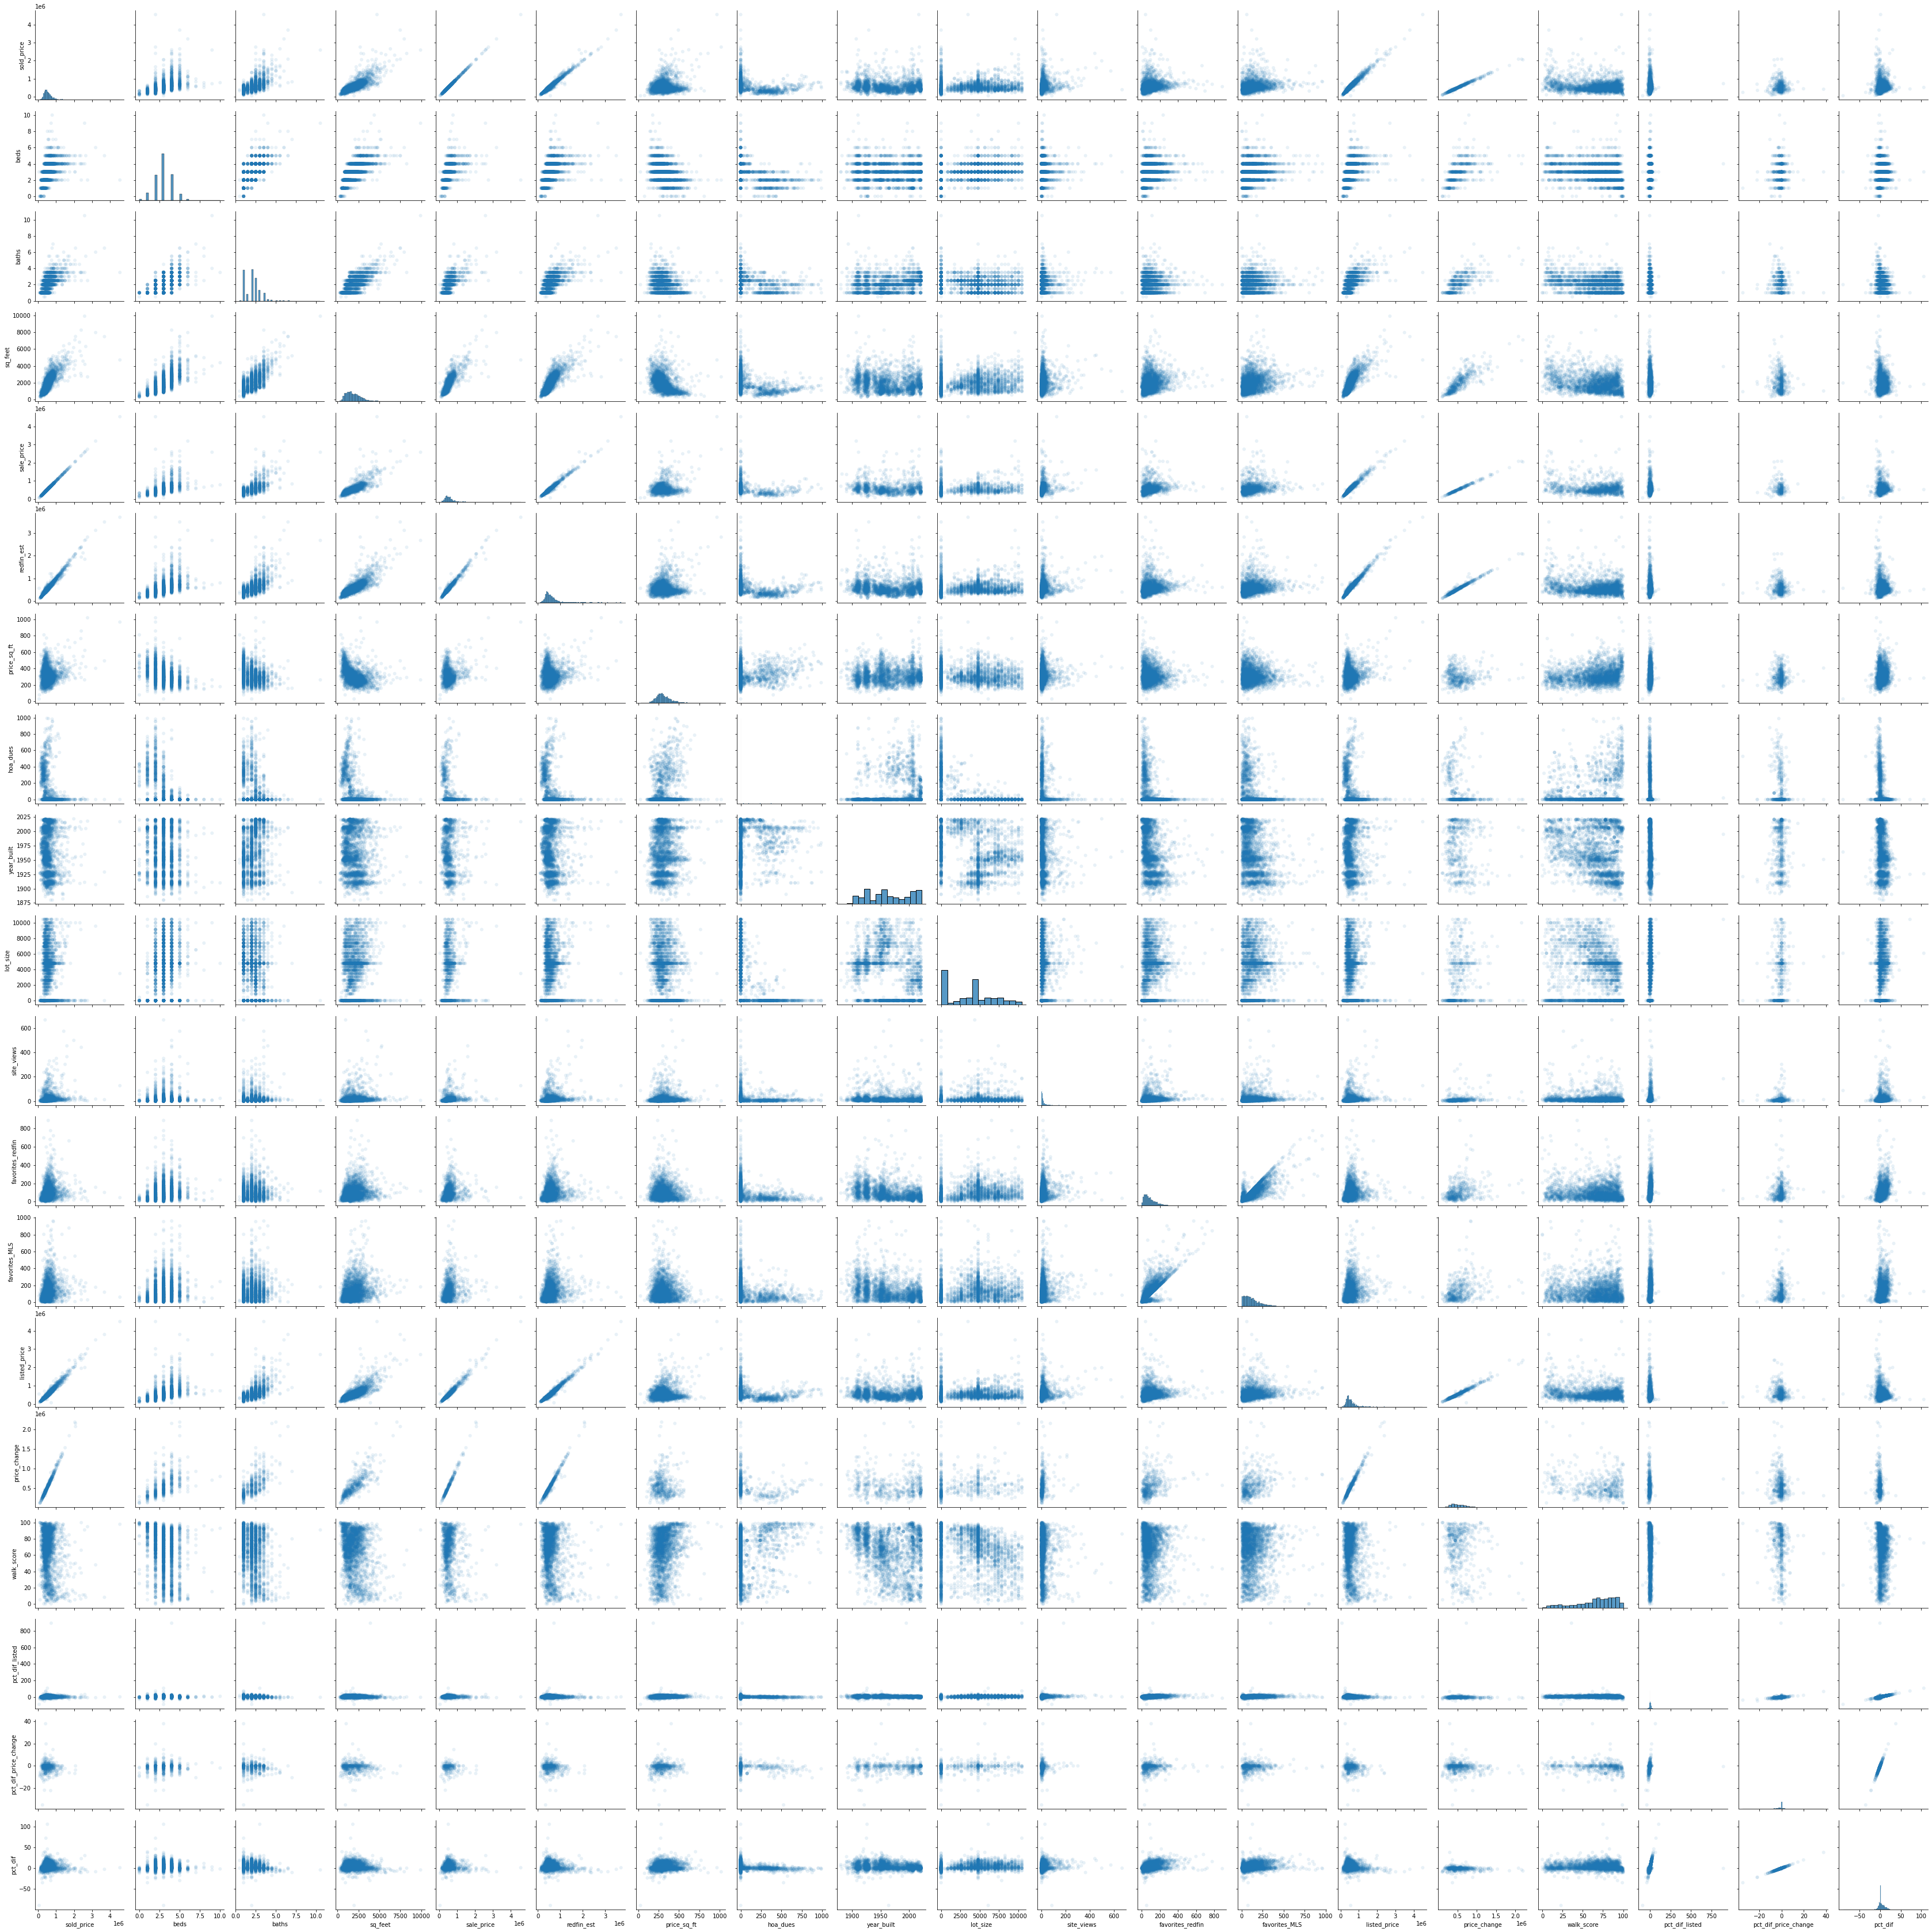

In [12]:
sns.pairplot(data = test_data, plot_kws=dict(alpha=.1, edgecolor='none'))

In [13]:
test_data.corr()

sold_price      beds     baths   sq_feet  sale_price  \
sold_price              1.000000  0.482935  0.599247  0.790836    1.000000   
beds                    0.482935  1.000000  0.645291  0.697659    0.467382   
baths                   0.599247  0.645291  1.000000  0.717861    0.605707   
sq_feet                 0.790836  0.697659  0.717861  1.000000    0.784699   
sale_price              1.000000  0.467382  0.605707  0.784699    1.000000   
redfin_est              0.987019  0.493030  0.616729  0.811260    0.986287   
price_sq_ft             0.170730 -0.386558 -0.271953 -0.382376    0.232798   
hoa_dues               -0.225288 -0.454477 -0.161778 -0.325010   -0.233133   
year_built             -0.070876 -0.053741  0.256862 -0.133986   -0.049639   
lot_size                0.059354  0.303594 -0.048300  0.133925    0.055800   
site_views              0.214017  0.087387  0.073994  0.149746    0.193138   
favorites_redfin        0.189010  0.195093  0.051426  0.217884    0.156942   
favorites_MLS           0.224638  0.202678  0.107037  0.244823    0.186313   
listed_price            0.982701  0.468612  0.611035  0.791170    0.982960   
price_change            0.996165  0.519215  0.645847  0.820253    0.997177   
walk_score             -0.159053 -0.264730 -0.270455 -0.258270   -0.157146   
pct_dif_listed          0.013360  0.032613 -0.035583 -0.000134   -0.015625   
pct_dif_price_change   -0.026846  0.082330 -0.071335 -0.068014   -0.047160   
pct_dif                 0.010478  0.027394 -0.142481 -0.061580   -0.002292   

                      redfin_est  price_sq_ft  hoa_dues  year_built  lot_size  \
sold_price              0.987019     0.170730 -0.225288   -0.070876  0.059354   
beds                    0.493030    -0.386558 -0.454477   -0.053741  0.303594   
baths                   0.616729    -0.271953 -0.161778    0.256862 -0.048300   
sq_feet                 0.811260    -0.382376 -0.325010   -0.133986  0.133925   
sale_price              0.986287     0.232798 -0.233133   -0.049639  0.055800   
redfin_est              1.000000     0.129396 -0.230172   -0.076690  0.054825   
price_sq_ft             0.129396     1.000000  0.183064    0.058697 -0.112710   
hoa_dues               -0.230172     0.183064  1.000000    0.269839 -0.514460   
year_built             -0.076690     0.058697  0.269839    1.000000 -0.313929   
lot_size                0.054825    -0.112710 -0.514460   -0.313929  1.000000   
site_views              0.185581     0.065253 -0.080529   -0.068450  0.044409   
favorites_redfin        0.174883    -0.056479 -0.294533   -0.349055  0.186652   
favorites_MLS           0.216072    -0.038567 -0.229588   -0.332287  0.125825   
listed_price            0.986406     0.150897 -0.185528   -0.043374  0.023031   
price_change            0.988603    -0.004079 -0.275587   -0.075068  0.138047   
walk_score             -0.152222     0.221494  0.191706   -0.265238 -0.130911   
pct_dif_listed         -0.021134     0.037710 -0.131683   -0.069046  0.152557   
pct_dif_price_change   -0.078497     0.096581 -0.156599    0.066353  0.146939   
pct_dif                -0.062628     0.118832 -0.271173   -0.205702  0.236166   

                      site_views  favorites_redfin  favorites_MLS  \
sold_price              0.214017          0.189010       0.224638   
beds                    0.087387          0.195093       0.202678   
baths                   0.073994          0.051426       0.107037   
sq_feet                 0.149746          0.217884       0.244823   
sale_price              0.193138          0.156942       0.186313   
redfin_est              0.185581          0.174883       0.216072   
price_sq_ft             0.065253         -0.056479      -0.038567   
hoa_dues               -0.080529         -0.294533      -0.229588   
year_built             -0.068450         -0.349055      -0.332287   
lot_size                0.044409          0.186652       0.125825   
site_views              1.000000          0.145157       0.136490   
favorites_re

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [108]:
test_data = test_data[test_data['favorites_redfin'].notna()]
X = test_data.loc[:,['listed_price', 'favorites_redfin', 'sq_feet', 'price_sq_ft', 'walk_score']]
y = test_data['pct_dif']

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
split_and_validate(X, y)

model = sm.regression.linear_model.OLS(y,X)
fit = model.fit()
fit.summary2()


Validation R^2 score was: 0.23730201807777207
Feature coefficient results: 

listed_price : -0.00
favorites_redfin : 0.03
sq_feet : 0.01
price_sq_ft : 0.04
walk_score : -0.02


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.403     
Dependent Variable:     pct_dif          AIC:                         17783.3632
Date:                   2021-05-13 11:19 BIC:                         17812.8719
No. Observations:       2702             Log-Likelihood:              -8886.7   
Df Model:               5                F-statistic:                 366.1     
Df Residuals:           2697             Prob (F-statistic):          3.97e-300 
R-squared (uncentered): 0.404            Scale:                       42.175    
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
listed_price        -0.0000      0.0000    -14.9373    0.0000    -0.0000    -0.0000
favorites_redfin     0.0327      0.0015     21.1386    0.0000     0.0297     0.0357
sq_feet              0.0020      0.0002      9.1839    0.0000     0.0016     0.0025
price_sq_ft          0.0205      0.0013     16.2994    0.0000     0.0180     0.0230
walk_score          -0.0441      0.0050     -8.8193    0.0000    -0.0539    -0.0343
--------------------------------------------------------------------------------
Omnibus:                   211.366           Durbin-Watson:              1.874  
Prob(Omnibus):             0.000             Jarque-Bera (JB):           723.709
Skew:                      0.351             Prob(JB):                   0.000  
Kurtosis:                  5.436             Condition No.:              26272  
================================================================================
* The condition number is large (3e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [17]:
X2 = X.copy()
X2['property_type'] = test_data['property_type']
split_and_validate(pd.get_dummies(X2, drop_first = True), y)


Validation R^2 score was: 0.5638356771377566
Feature coefficient results: 

sold_price : 0.00
listed_price : -0.00
favorites_redfin : 0.02
sq_feet : -0.00
price_sq_ft : 0.01
walk_score : 0.00
property_type_Residential, Condominium : -1.93
property_type_Residential, Floating Home : -3.52
property_type_Residential, Single Family Residence : 0.48


In [18]:
prop_dummies = test_data['property_type'].apply(pd.get_dummies, drop_first = True)
zipcode_dummies = test_data['zipcode'].apply(pd.get_dummies, drop_first=True)

In [19]:
#Look at zipcode maybe?
pd.get_dummies(test_data['zipcode'])

97035  97201  97202  97203  97205  97206  97209  97210  97211  97212  \
0       0      1      0      0      0      0      0      0      0      0   
1       0      1      0      0      0      0      0      0      0      0   
2       0      1      0      0      0      0      0      0      0      0   
3       0      1      0      0      0      0      0      0      0      0   
4       0      1      0      0      0      0      0      0      0      0   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
63      0      0      0      0      0      0      0      0      0      0   
64      0      0      0      0      0      0      0      0      0      0   
69      0      0      0      0      0      0      0      0      0      0   
71      0      0      0      0      0      0      0      0      0      0   
73      0      0      0      0      0      0      0      0      0      0   

    97213  97214  97215  97216  97217  97218  97219  97220  97221  97223  \
0       0      0      0      0      0      0      0      0      0      0   
1       0      0      0      0      0      0      0      0      0      0   
2       0      0      0      0      0      0      0      0      0      0   
3       0      0      0      0      0      0      0      0      0      0   
4       0      0      0      0      0      0      0      0      0      0   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
63      0      0      0      0      0      0      0      0      0      0   
64      0      0      0      0      0      0      0      0      0      0   
69      0      0      0      0      0      0      0      0      0      0   
71      0      0      0      0      0      0      0      0      0      0   
73      0      0      0      0      0      0      0      0      0      0   

    97224  97225  97227  97229  97230  97232  97233  97236  97239  97266  
0       0      0      0      0      0      0      0      0      0      0  
1       0      0      0      0      0      0      0      0      0      0  
2       0      0      0      0      0      0      0      0      0      0  
3       0      0      0      0      0      0      0      0      0      0  
4       0      0      0      0      0      0      0      0      0      0  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
63      0      0      0      0      0      0      0      0      0      1  
64      0      0      0      0      0      0      0      0      0      1  
69      0      0      0      0      0      0      0      0      0      1  
71      0      0      0      0      0      0      0      0      0      1  
73      0      0      0      0      0      0      0      0      0      1  

[2750 rows x 30 columns]